# Integrated Project - Game Sales



## Introduction

In this project, I will be analysing sales data from the online store Ice. The purpose of this project is to prepare for a campaign on 2017. I will try to analyze and identify patterns on which games would succeed next year so I may provide useful insights and data-driven decisions which would ultimately spot big winners and plan for the advertising campaigns. 

For this project, I will be going through 3 steps:

1. [Data Overview](#data_overview)
2. [Data Preprocessing](#data_preprocessing)
3. [Data Analysis](#data_analysis)

First, I will look over the data set to get an overview of how the dataset looks like. I will also begin to identify whether or not some parts of the data need to be fixed such as column names, empty values and/or duplicates, etc.

Next, I will begin the preprocessing of the data, which involves changing the column names to its appropriate format, filling in any empty data with appropriate values, and decide what to do with the duplicates should there be some. I will also fix any columns with wrong data types to its correct one.

Finally, I'll begin the analysis of the data and gather information in regards to the campaign, as well as formulating hypotheses and studying them. I'll also add some region profiling to determine the games to sell for each region. At the end, I will provide conclusions to all of my findings regarding the data.

## Initializing

In [1]:
# Importing necessary libraries and modules

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats as st
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<a id='data_overview'></a>
## Data Overview  

In [2]:
# Pulling the dataset and assigning a variable to it

df = pd.read_csv('/datasets/games.csv')

In [3]:
# Getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Pulling the top 10 rows of the dataset for a better look
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

From the overview it looks like there are some missing data on a few columns, namely on Name, Year of Release, Genre, and the scores and ratings columns. There are also some columns with mismatched data types such as the YoR, the User Score, and the Rating columns. The columns' names are also capitalized.

<a id='data_preprocessing'></a>
## Data Preprocessing

I will begin the preproccesing of the data.

### Renaming columns

In [5]:
# Changing the column names to the appropriate format

df.columns = df.columns.str.lower()
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

This formatting helps simplify the coding process when I have to access the columns. Next I will have to convert the columns to their corresponding data type, but before that I have to take care of some of the missing values.

### Dealing with missing values & data types

In [6]:
# Pulling number of missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

The missing values from the name, year of release, and genre columns barely represent 1% of the data, so I've decided to drop the rows that have missing values on those columns as they won't affect the analysis too much.

In [7]:
# Dropping the rows with empty values from those columns
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
df.head(20)

name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   

   user_score rating  
0           8      E  
1         NaN    NaN  
2         8.3      E  
3           8      E  
4         NaN    NaN  
5         NaN    NaN  
6         8.5      E  
7         6.6      E  
8         8.4      E  
9         NaN    NaN  
10        NaN    NaN  
11        8.6      E  
12        NaN    NaN  
13        7.7      E  
14        6.3      E  
15        7.4      E  
16        8.2      M  
17          9      M  
18        NaN    NaN  
19        7.9      E

In [8]:
# Changing the data type of the year of release column
df.year_of_release = df.year_of_release.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

The missing values from the scores and rating column represent a lot of the data and therefore cannot be dropped casually. I need to find the appropriate values to fill the missing values from these columns.

In [10]:
# Looking at the rows that has empty values on critics
df[(df.critic_score.isna())].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN

I can't seem to find a pattern as to why the values are empty.

As there are around 50% of the data in the columns that are missing, I have decided to leave the missing critic score values alone for now.

In [11]:
# Checking the unique values in the user score column
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There seems to be a string on this column. I will check the rows that has this value to find out how to deal with it.

In [12]:
# Pulling rows with tbd on the score
df[df.user_score == 'tbd']

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
300    Namco Museum: 50th Anniversary      PS2             2005        Misc   
516                   Zumba Fitness 2      Wii             2011      Sports   
639                      uDraw Studio      Wii             2010        Misc   
709                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16424                 Planet Monsters      GBA             2001      Action   
16426                Bust-A-Move 3000       GC             2003      Puzzle   
16427                Mega Brain Boost       DS             2008      Puzzle   
16433                        Plushees       DS             2008  Simulation   
16435   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119        3.45      2.59       0.0         0.66           NaN        tbd   
300        2.08      1.35       0.0         0.54          61.0        tbd   
516        1.51      1.03       0.0         0.27           NaN        tbd   
639        1.65      0.57       0.0         0.20          71.0        tbd   
709        1.52      0.54       0.0         0.18           NaN        tbd   
...         ...       ...       ...          ...           ...        ...   
16424      0.01      0.00       0.0         0.00          67.0        tbd   
16426      0.01      0.00       0.0         0.00          53.0        tbd   
16427      0.01      0.00       0.0         0.00          48.0        tbd   
16433      0.01      0.00       0.0         0.00           NaN        tbd   
16435      0.01      0.00       0.0         0.00           NaN        tbd   

      rating  
119        E  
300     E10+  
516        T  
639        E  
709        E  
...      ...  
16424      E  
16426      E  
16427      E  
16433      E  
16435      T  

[2376 rows x 11 columns]

The tbd seems to be a placeholder for missing values. It seems it was due to low sales on the regions and therefore not enough users were around to put a score on it. 

In [13]:
# Changing tbd to missing value for uniformness
df.user_score[df.user_score == 'tbd'] = np.nan

# Changing the column to its appropriate data type
df.user_score = df.user_score.astype('float', errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
# Pulling rows with empty values on the rating column
df[df.rating.isna()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16439  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16440               LMA Manager 2007     X360             2006        Sports   
16441        Haitaka no Psychedelica      PSV             2016     Adventure   
16442               Spirits & Spells      GBA             2003      Platform   
16443            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16439      0.00      0.00      0.01         0.00           NaN         NaN   
16440      0.00      0.01      0.00         0.00           NaN         NaN   
16441      0.00      0.00      0.01         0.00           NaN         NaN   
16442      0.01      0.00      0.00         0.00           NaN         NaN   
16443      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16439    NaN  
16440    NaN  
16441    NaN  
16442    NaN  
16443    NaN  

[6676 rows x 11 columns]

In [16]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

It seems some of the ratings with the empty values are the ones that also had empty values on the  critic and user scores.

As it is impossible to fill the rating to something else without affecting the analysis, I have decided to keep the missing values as well.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


All the missing values and data types have been corrected.

### Duplicates

In [18]:
# Checking for explicit duplicates

df.duplicated().sum()

0

No explicit duplicates.

In [19]:
# Checking rows where the games name show more than once on one platform
df[['name', 'platform']].duplicated().sum()

3

In [20]:
# Pulling the game and platforms that have duplicates
dupl = df[['name', 'platform']]
dupl[dupl.duplicated(keep=False)]

name platform
600                  Madden NFL 13      PS3
1177   Need for Speed: Most Wanted     X360
1574   Need for Speed: Most Wanted     X360
5883   Need for Speed: Most Wanted       PC
11534  Need for Speed: Most Wanted       PC
15969                Madden NFL 13      PS3

It seems there might be duplicates for these entries.

In [21]:
# Pulling the rows with those names and the platforms
df[(df.name.isin(['Madden NFL 13', 'Need for Speed: Most Wanted'])) & (df.platform.isin(['PS3','X360', 'PC']))].sort_values(by='name')

name platform  year_of_release   genre  \
503                  Madden NFL 13     X360             2012  Sports   
600                  Madden NFL 13      PS3             2012  Sports   
15969                Madden NFL 13      PS3             2012  Sports   
519    Need for Speed: Most Wanted      PS3             2012  Racing   
1177   Need for Speed: Most Wanted     X360             2012  Racing   
1574   Need for Speed: Most Wanted     X360             2005  Racing   
5883   Need for Speed: Most Wanted       PC             2005  Racing   
11534  Need for Speed: Most Wanted       PC             2012  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
503        2.53      0.15      0.00         0.17          81.0         5.8   
600        2.11      0.22      0.00         0.23          83.0         5.5   
15969      0.00      0.01      0.00         0.00          83.0         5.5   
519        0.71      1.46      0.06         0.58           NaN         NaN   
1177       0.62      0.78      0.01         0.15          83.0         8.5   
1574       1.00      0.13      0.02         0.10          83.0         8.5   
5883       0.02      0.23      0.00         0.04          82.0         8.5   
11534      0.00      0.06      0.00         0.02          82.0         8.5   

      rating  
503        E  
600        E  
15969      E  
519      NaN  
1177       T  
1574       T  
5883       T  
11534      T

It seems that even though the entries may share the same name and platform, they have their own year of release as well as sales, which shows that they are separate ones. For this reason I have decided to keep these duplicates.

In [22]:
# Adding total sales column

df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(10)

name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77           NaN         NaN    NaN   
2     15.68     12.76      3.79         3.29          82.0         8.3      E   
3     15.61     10.93      3.28         2.95          80.0         8.0      E   
4     11.27      8.89     10.22         1.00           NaN         NaN    NaN   
5     23.20      2.26      4.22         0.58           NaN         NaN    NaN   
6     11.28      9.14      6.50         2.88          89.0         8.5      E   
7     13.96      9.18      2.93         2.84          58.0         6.6      E   
8     14.44      6.94      4.70         2.24          87.0         8.4      E   
9     26.93      0.63      0.28         0.47           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9        28.31

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Now the data looks great and is ready to be analyzed.

<a id='data_analysis'></a>
## Data Analysis

I will begin the analysis of the data.

### Data by year

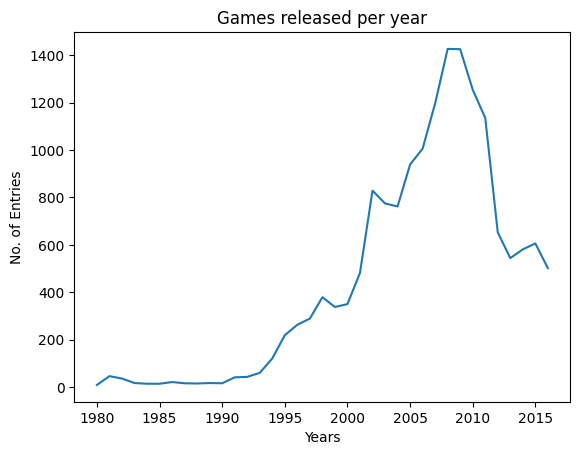

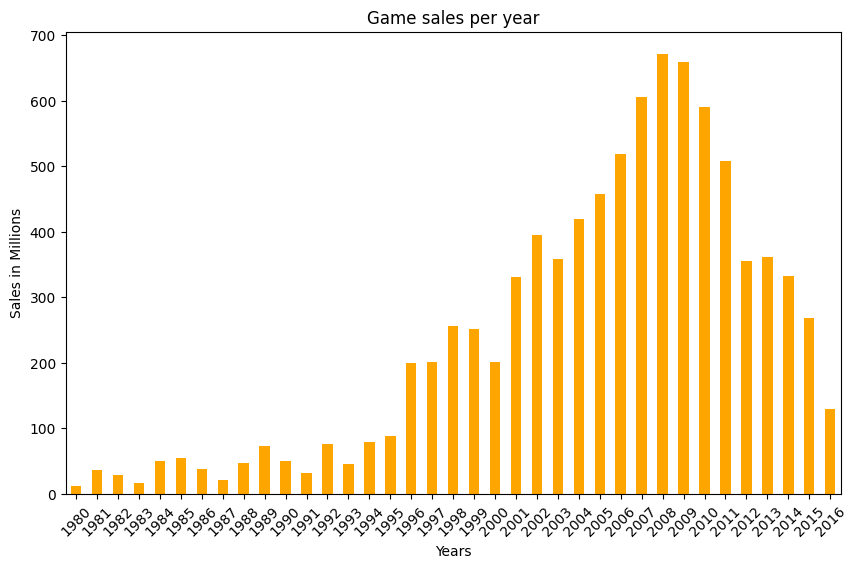

In [24]:
# Checking the number of entries and sales based on the year of releases

year_count = df.groupby('year_of_release').count()['name'].to_frame()
year_sales = df.groupby('year_of_release').sum()['total_sales'].to_frame()

by_year = year_count.merge(year_sales, left_index=True, right_index=True).rename(columns={'name':'count'})

by_year.plot(
    xlabel='Years',
    title='Games released per year',
    ylabel = 'No. of Entries',
    y='count',
    legend=False
)

by_year.plot(
    xlabel='Years',
    title='Game sales per year',
    ylabel = 'Sales in Millions',
    y='total_sales',
    legend=False,
    color='orange',
    kind='bar',
    figsize=[10, 6],
)
plt.xticks(rotation=45)
plt.show()

It seems that the amount of games as well as sales starting from 1980 up to 1993 was very low. The amount of entries  and sales started going up drastically in the early 2000s, reaching over 1000 entries in a year after 2006. It keeps rising until it starts dropping slowly till 2011, and the entries then nearly halved on 2012, and continues to stay around the same amount each year until now. This shows that the market stabilized after the sales came back down.

In [25]:
# Reviewer's code 2

df.groupby('year_of_release')['name'].count().plot.bar(figsize=(12,6))

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(rotation=45);

In [26]:
# Checking entries by platform
platform_sales = df.groupby('platform').sum()['total_sales'].to_frame()
platform_count = df.groupby('platform').count()['na_sales'].to_frame()

by_platform = platform_count.merge(platform_sales, right_index=True, left_index=True).rename(columns={'na_sales':'count'})
# Showing top 10 platforms

top_10_index = by_platform.sort_values(by='total_sales', ascending=False).iloc[0:10].index
by_platform.sort_values(by='total_sales', ascending=False).iloc[0:10]

count  total_sales
platform                    
PS2        2127      1233.56
X360       1232       961.24
PS3        1306       931.34
Wii        1286       891.18
DS         2121       802.78
PS         1190       727.58
PS4         392       314.14
GBA         811       312.88
PSP        1193       289.53
3DS         512       257.81

PS2 seems to be the most profitable platform, reaching over 1.3 billion dallers, followed by X360, PS3, Wii, DS and the PS.

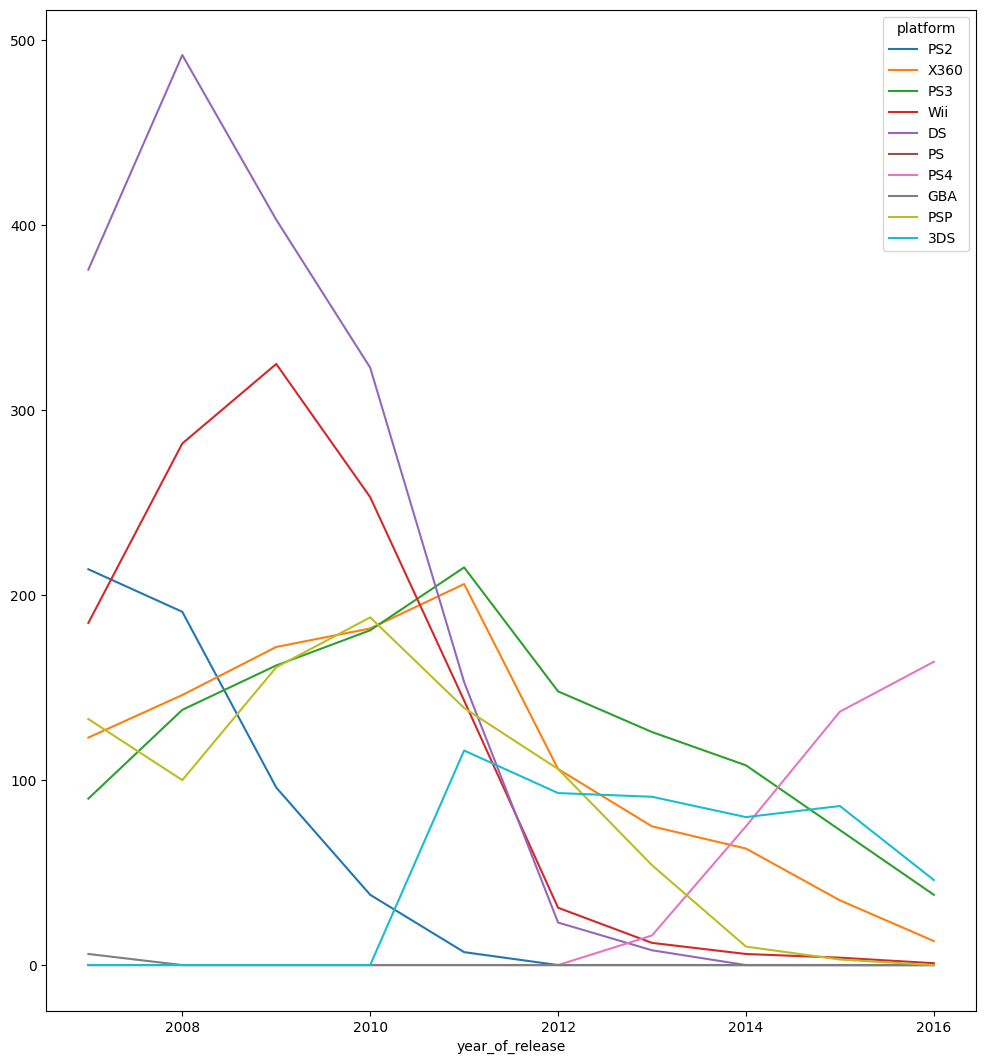

platform         PS2  X360  PS3  Wii   DS  PS  PS4  GBA  PSP  3DS
year_of_release                                                  
2007             214   123   90  185  376   0    0    6  133    0
2008             191   146  138  282  492   0    0    0  100    0
2009              96   172  162  325  403   0    0    0  161    0
2010              38   182  181  253  323   0    0    0  188    0
2011               7   206  215  143  153   0    0    0  139  116
2012               0   106  148   31   23   0    0    0  106   93
2013               0    75  126   12    8   0   16    0   54   91
2014               0    63  108    6    0   0   75    0   10   80
2015               0    35   73    4    0   0  137    0    3   86
2016               0    13   38    1    0   0  164    0    0   46

In [27]:
# Pivoting the table to see the amount of entries sold each platform per year
count_per_platform = pd.pivot_table(
    df,
    columns='platform',
    index='year_of_release',
    aggfunc='count',
    values='name',
    fill_value=0
)

count_per_platform[top_10_index].tail(10).plot(
    figsize = [12, 13]
)

plt.show()
count_per_platform[top_10_index].tail(10)

In [28]:
# Checking how many years do platforms stay relevant
print(count_per_platform.astype(bool).sum(axis=0).sort_values(ascending=False).median())
print(count_per_platform.astype(bool).sum(axis=0).sort_values(ascending=False).mean())
count_per_platform.astype(bool).sum(axis=0).sort_values(ascending=False).iloc[0:10]

7.0
7.67741935483871


platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
dtype: int64

From the data we can see that sales from the platforms last around 7 years.

Based on the data gathered so far, I can conclude up to 2011, there was a spike on the sales, giving a really high number which could skew the data distribution and show unreliable results. The market seems to stabilize right after, and has had an almost the same amount until this year. Therefore I am going to use the data from 2012 until 2016.

### Platform (New Table)

In [29]:

# Cutting the data to only >2011
df_new = df[df.year_of_release>2011]
df_new

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
34        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                              ...      ...              ...           ...   
16432               Strawberry Nauts      PSV             2016     Adventure   
16436               Aiyoku no Eustia      PSV             2014          Misc   
16439  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16441        Haitaka no Psychedelica      PSV             2016     Adventure   
16443            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
34         4.99      5.73      0.65         2.42          83.0         5.3   
...         ...       ...       ...          ...           ...         ...   
16432      0.00      0.00      0.01         0.00           NaN         NaN   
16436      0.00      0.00      0.01         0.00           NaN         NaN   
16439      0.00      0.00      0.01         0.00           NaN         NaN   
16441      0.00      0.00      0.01         0.00           NaN         NaN   
16443      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  
16         M        21.05  
23         M        16.27  
31       NaN        14.63  
33       NaN        14.60  
34         M        13.79  
...      ...          ...  
16432    NaN         0.01  
16436    NaN         0.01  
16439    NaN         0.01  
16441    NaN         0.01  
16443    NaN         0.01  

[2886 rows x 12 columns]

In [30]:
# Setting all the previous variables with the new dataframe

# Checking entries by platform
platform_sales = df_new.groupby('platform').sum()['total_sales'].to_frame()
platform_count = df_new.groupby('platform').count()['na_sales'].to_frame()

by_platform = platform_count.merge(platform_sales, right_index=True, left_index=True).rename(columns={'na_sales':'count'})


# Checking the number of entries and sales based on the year of releases

year_count = df_new.groupby('year_of_release').count()['name'].to_frame()
year_sales = df_new.groupby('year_of_release').sum()['total_sales'].to_frame()

by_year = year_count.merge(year_sales, left_index=True, right_index=True).rename(columns={'name':'count'})

# Pivoting the table to see the amount of entries sold each platform per year
count_per_platform = pd.pivot_table(
    df_new,
    columns='platform',
    index='year_of_release',
    aggfunc='count',
    values='name',
    fill_value=0
)


In [31]:
by_platform.sort_values(by='total_sales', ascending=False)

count  total_sales
platform                    
PS4         392       314.14
PS3         493       288.79
X360        292       236.54
3DS         396       194.61
XOne        247       159.32
WiiU        147        82.19
PC          250        62.65
PSV         411        49.18
Wii          54        35.37
DS           31        12.55
PSP         173        11.19

In [32]:
by_year.sort_values(by='total_sales', ascending=False)

count  total_sales
year_of_release                    
2013               544       361.24
2012               653       355.84
2014               581       331.53
2015               606       267.98
2016               502       129.94

In [33]:
count_per_platform

platform         3DS  DS  PC  PS3  PS4  PSP  PSV  Wii  WiiU  X360  XOne
year_of_release                                                        
2012              93  23  61  148    0  106   53   31    32   106     0
2013              91   8  38  126   16   54   63   12    42    75    19
2014              80   0  47  108   75   10  100    6    31    63    61
2015              86   0  50   73  137    3  110    4    28    35    80
2016              46   0  54   38  164    0   85    1    14    13    87

In [34]:
# Pivotting the table to yearly sales of each platform
sales_per_platform = pd.pivot_table(
    df_new,
    columns='platform',
    index='year_of_release',
    aggfunc='sum',
    values='total_sales',
    fill_value=0
)

sales_per_platform

platform           3DS     DS     PC     PS3     PS4   PSP    PSV    Wii  \
year_of_release                                                            
2012             51.36  11.01  23.22  107.36    0.00  7.69  16.19  21.71   
2013             56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014             43.76   0.00  13.28   47.76  100.00  0.24  11.90   3.75   
2015             27.78   0.00   8.52   16.82  118.90  0.12   6.25   1.14   
2016             15.14   0.00   5.25    3.60   69.25  0.00   4.25   0.18   

platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74   0.00  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

The data suggests that recent platforms tend to peak around 3 years after their first release. Some platforms such as the PC and X360 keep making sales years after their first entries. These consoles seem to say relevant for long periods of time. Some consoles no longer made sales such as the DS and GC. I will take of some platforms that had no more sales for 1+ years.

In [35]:
# Dropping the platforms' columns that no longer make sales
stopped_platforms = ['DS', 'PSP']
sales_per_platform = sales_per_platform.drop(stopped_platforms, axis=1)
count_per_platform = count_per_platform.drop(stopped_platforms, axis=1)

#### Counts and Sales Platform

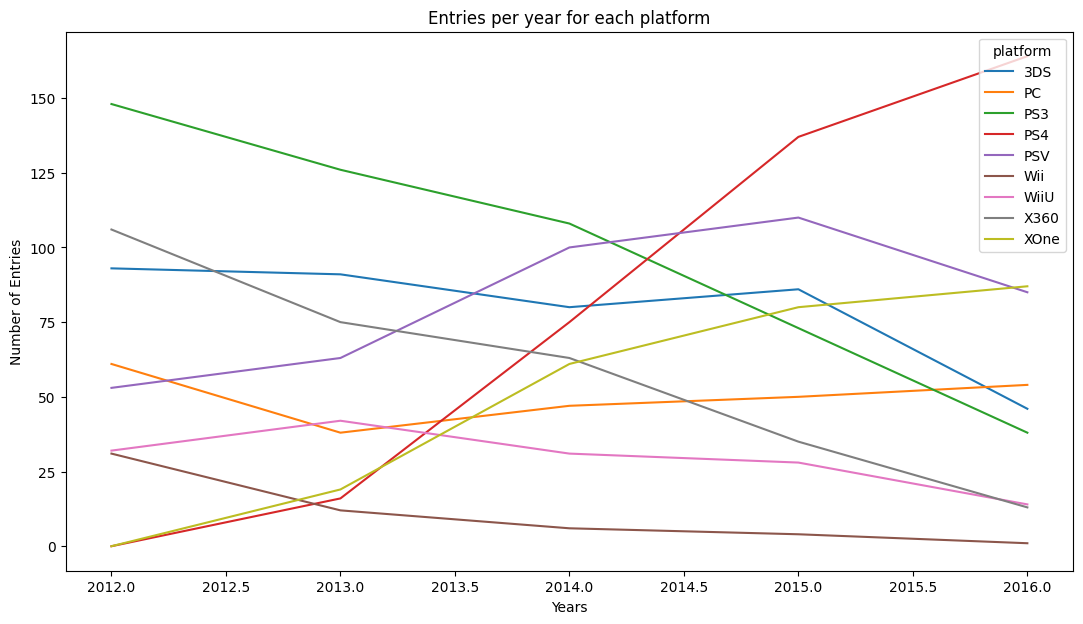

platform         3DS  PC  PS3  PS4  PSV  Wii  WiiU  X360  XOne
year_of_release                                               
2012              93  61  148    0   53   31    32   106     0
2013              91  38  126   16   63   12    42    75    19
2014              80  47  108   75  100    6    31    63    61
2015              86  50   73  137  110    4    28    35    80
2016              46  54   38  164   85    1    14    13    87

In [36]:
# Creating plots to visualize the changes for each platform per year

count_per_platform.plot(
    figsize=[13, 7],
    xlabel='Years',
    ylabel='Number of Entries',
    title='Entries per year for each platform'
)

plt.show()

count_per_platform

In [37]:
# Visualizing sales per year
sales_per_platform.plot(
    figsize=[13, 7],
    xlabel='Years',
    ylabel='Sales in Million Dollars',
    title='Sales per year for each platform'
)

plt.show()

sales_per_platform

platform           3DS     PC     PS3     PS4    PSV    Wii   WiiU   X360  \
year_of_release                                                             
2012             51.36  23.22  107.36    0.00  16.19  21.71  17.56  99.74   
2013             56.57  12.38  113.25   25.99  10.59   8.59  21.65  88.58   
2014             43.76  13.28   47.76  100.00  11.90   3.75  22.03  34.74   
2015             27.78   8.52   16.82  118.90   6.25   1.14  16.35  11.96   
2016             15.14   5.25    3.60   69.25   4.25   0.18   4.60   1.52   

platform          XOne  
year_of_release         
2012              0.00  
2013             18.96  
2014             54.07  
2015             60.14  
2016             26.15

In [38]:
# Re-pivoting the table to show total sales for the relevant platforms
sales_pivoted = sales_per_platform.transpose()
sales_pivoted['total'] = sales_pivoted.sum(axis=1)
sales_pivoted.sort_values(by='total', ascending=False)

year_of_release    2012    2013    2014    2015   2016   total
platform                                                      
PS4                0.00   25.99  100.00  118.90  69.25  314.14
PS3              107.36  113.25   47.76   16.82   3.60  288.79
X360              99.74   88.58   34.74   11.96   1.52  236.54
3DS               51.36   56.57   43.76   27.78  15.14  194.61
XOne               0.00   18.96   54.07   60.14  26.15  159.32
WiiU              17.56   21.65   22.03   16.35   4.60   82.19
PC                23.22   12.38   13.28    8.52   5.25   62.65
PSV               16.19   10.59   11.90    6.25   4.25   49.18
Wii               21.71    8.59    3.75    1.14   0.18   35.37

From this data we can see that the PS3 still leads in sales, followed by the X360 and PS4. The PS3 has been around for 11 years however, and shows a decline in its sales after its peak 5 years ago, which means it may drop even further next year. This means PS3 might not make the best sales for the upcoming year. Recent platforms such as the PS4 and the XOne, which were first released in 2013, shows a hugh jump in sales just one year after their initial publication, and they are fairly new, which could to more sales in the upcoming year as they still have potential. PC games are unique in the way that they've always been and will always be in the market, as they are separate from 'gaming consoles', which would lead to them always staying relevant throughout the years.

Based on these observations, I'm certain that platforms such as the PS4, XOne, and PC would lead in sales next year and possibly the WiiU, 3DS and PSV, which are the consoles to invest on advertisement in for the next campaign, as they are still below the average year in which consoles die down, and still have the potential to be very profitable for 2017.

#### Distribution Boxplot

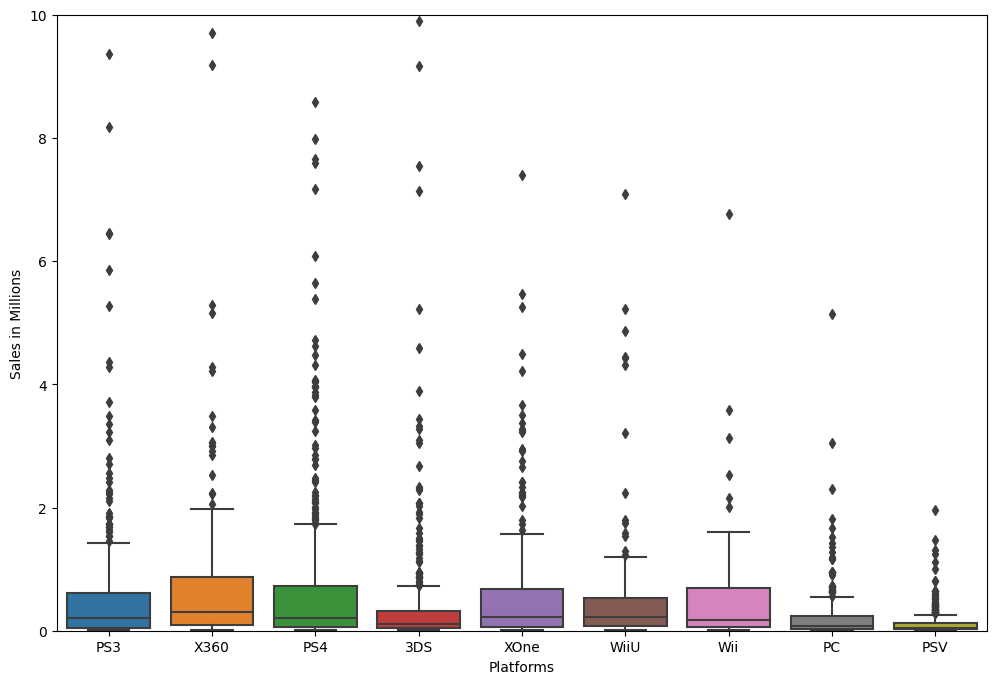

In [39]:
# Creating boxplots for sales per platform, and setting a limit to the plot
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(
    data=df_new[~df_new.platform.isin(stopped_platforms)],
    x='platform',
    y='total_sales',
    ax=ax
)
ax.set(xlabel='Platforms', ylabel='Sales in Millions', ylim=(0, 10))
plt.show()


From the data we can see that there are a lot of outliers across all platforms. This might suggest that every platform has a few entries that are popular to the point that they sell more than the max value of the distribution. These extreme values show that plaforms have a high chance of there being entries that do much better than the other ones.

#### Plots to find correlation

In [40]:
# Looking for the platforms' correlation between the entries' scores and sales

pc = df_new[df_new.platform == 'PC']
ps3 = df_new[df_new.platform == 'PS3']
xone = df_new[df_new.platform == 'XOne']
ds_3 = df_new[df_new.platform == '3DS']

fig = px.scatter(
    pc,
    x='user_score',
    y='total_sales',
    hover_data=['name'],
    trendline='ols',
    title="PC's User score to sales"
)

fig.show()
print('Correlation Coefficient:\n\n', pc[['user_score', 'total_sales']].corr())

Correlation Coefficient:

              user_score  total_sales
user_score     1.000000    -0.121867
total_sales   -0.121867     1.000000


In [41]:
fig = px.scatter(
    pc,
    x='critic_score',
    y='total_sales',
    hover_data=['name'],
    trendline='ols',
    title="PC's Critic score to sales"
)

fig.show()
print('Correlation Coefficient:\n\n',pc[['critic_score', 'total_sales']].corr())

Correlation Coefficient:

               critic_score  total_sales
critic_score      1.000000     0.237243
total_sales       0.237243     1.000000


While the user scores don't have a clear impact to the sales, the critic scores for PC games seem to show that the higher it is, the higher the sales for the game tend to be as well, which is suggested by the higher correlation coefficient.

I am going to chart a few other platforms to make reliable comparisons.

In [42]:
fig = px.scatter(
    ps3,
    x='critic_score',
    y='total_sales',
    hover_data=['name'],
    trendline='ols',
    title="PS3's Critic score to sales"
)

fig2 = px.scatter(
    ps3,
    x='user_score',
    y='total_sales',
    hover_data=['name'],
    trendline='ols',
    title="PS3's User score to sales"
)

fig.show()
fig2.show()
print('Correlation Coefficient:\n\n', ps3[['user_score', 'critic_score', 'total_sales']].corr())

Correlation Coefficient:

               user_score  critic_score  total_sales
user_score      1.000000      0.539456    -0.005144
critic_score    0.539456      1.000000     0.331497
total_sales    -0.005144      0.331497     1.000000


The PS3 has shown a similar behaviour in the correlation between the scores and their sales. It seems critic scores has a clear impact on the number of sales, having a linear correlation to one another, as well as a stronger correlation coefficient in sales compared to user score's.

In [43]:
# More charts
fig = px.scatter(
    xone,
    x='user_score',
    y='total_sales',
    title="Xbox One's user score to sales",
    hover_data=['name'],
    trendline='ols'
)

fig2 = px.scatter(
    xone,
    x='critic_score',
    y='total_sales',
    title="Xbox One's critic score to sales",
    hover_data=['name'],
    trendline='ols'
)

fig.show()
fig2.show()
print("Correlation Coefficient:\n\n", xone[['user_score', 'critic_score', 'total_sales']].corr())

Correlation Coefficient:

               user_score  critic_score  total_sales
user_score      1.000000      0.472462    -0.068925
critic_score    0.472462      1.000000     0.416998
total_sales    -0.068925      0.416998     1.000000


In [44]:
fig = px.scatter(
    ds_3,
    x='user_score',
    y='total_sales',
    title="3DS's user score to sales",
    hover_data=['name'],
    trendline='ols'
)

fig2 = px.scatter(
    ds_3,
    x='critic_score',
    y='total_sales',
    title="3DS's critic score to sales",
    hover_data=['name'],
    trendline='ols'
)

fig.show()
fig2.show()
print("Correlation Coefficient:\n\n", ds_3[['user_score', 'critic_score', 'total_sales']].corr())

Correlation Coefficient:

               user_score  critic_score  total_sales
user_score      1.000000      0.722762     0.197583
critic_score    0.722762      1.000000     0.320803
total_sales     0.197583      0.320803     1.000000


The XOne and the 3DS also show the same behaviour, with critic scores having a much stronger correlation coefficient with the sales compared to the user scores. This further reinforces the hypothesis that critic scores actually influence platforms' sales.

### Genre

In [45]:
# Grouping the dataset by genres and their sales within the relevant time interval

genre_sales = df_new.groupby('genre').sum().drop(['year_of_release', 'user_score', 'critic_score'], axis=1)

genre_sales.sort_values(by='total_sales', ascending=False)

na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Action          177.84    159.34     52.80        51.14       441.12
Shooter         144.77    113.47      9.23        37.26       304.73
Role-Playing     64.00     48.53     65.44        14.83       192.80
Sports           81.53     69.09      8.01        22.44       181.07
Misc             38.19     26.32     12.86         7.67        85.04
Platform         25.38     21.41      8.63         5.58        61.00
Racing           17.22     27.29      2.50         6.49        53.50
Fighting         19.79     10.79      9.44         4.47        44.49
Simulation        7.97     14.55     10.41         2.19        35.12
Adventure         8.92      9.46      8.24         2.81        29.43
Strategy          4.23      5.17      2.88         1.06        13.34
Puzzle            1.13      1.40      2.14         0.22         4.89

This table suggests that Action seems to generate the most profit.

In [46]:
# Getting the mean and median for better comparison
avg_gen_sales = df_new.groupby('genre').mean().drop(['year_of_release', 'user_score', 'critic_score'], axis=1).round(2)
med_gen_sales = df_new.groupby('genre').median().drop(['year_of_release', 'user_score', 'critic_score'], axis=1)

avg_gen_sales.sort_values(by='total_sales', ascending=False)

na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Shooter           0.62      0.48      0.04         0.16         1.30
Platform          0.30      0.25      0.10         0.07         0.72
Sports            0.30      0.26      0.03         0.08         0.68
Role-Playing      0.17      0.13      0.18         0.04         0.52
Racing            0.15      0.24      0.02         0.06         0.47
Misc              0.20      0.14      0.07         0.04         0.44
Simulation        0.10      0.18      0.13         0.03         0.44
Action            0.17      0.15      0.05         0.05         0.43
Fighting          0.18      0.10      0.09         0.04         0.41
Strategy          0.06      0.07      0.04         0.01         0.19
Puzzle            0.04      0.05      0.08         0.01         0.17
Adventure         0.03      0.03      0.03         0.01         0.10

In [47]:
med_gen_sales.sort_values(by='total_sales', ascending=False)

na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Shooter           0.20     0.170      0.00         0.05        0.440
Sports            0.08     0.050      0.00         0.02        0.240
Platform          0.09     0.080      0.00         0.02        0.210
Role-Playing      0.02     0.010      0.06         0.01        0.140
Racing            0.04     0.090      0.00         0.02        0.140
Fighting          0.05     0.020      0.03         0.01        0.130
Action            0.02     0.020      0.01         0.01        0.120
Misc              0.01     0.015      0.02         0.00        0.120
Simulation        0.00     0.030      0.00         0.01        0.120
Strategy          0.00     0.010      0.00         0.00        0.080
Puzzle            0.00     0.010      0.00         0.00        0.045
Adventure         0.00     0.000      0.01         0.00        0.030

At first glance it's as though some genres such as Action had a lot of sales due to the fact that they have a lot of entries. But when we see the average and median tables, they actually show that Shooter has more sales per game unit, followed by Platform and Sports. This means that Shooter genre have the best ratio in sales per entry, even when its number of games don't reach the top 5 of most entries per genre.

#### Pivot tables and plots

In [48]:
# Pivoting the tables for clearer view of sales per year of each genre
sales_per_genre = pd.pivot_table(
    df_new,
    index='year_of_release',
    columns='genre',
    values='total_sales',
    aggfunc='mean',
    fill_value=0
)

count_per_genre = pd.pivot_table(
    df_new,
    index='year_of_release',
    columns='genre',
    values='name',
    aggfunc='count',
    fill_value=0
)

sales_per_genre.round(2)

genre            Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
year_of_release                                                                
2012               0.45       0.10      0.32  0.60      1.67    0.16    0.45   
2013               0.83       0.10      0.35  0.60      0.68    0.32    0.77   
2014               0.52       0.07      0.69  0.56      0.88    0.21    0.62   
2015               0.28       0.15      0.38  0.30      0.47    0.12    0.45   
2016               0.17       0.07      0.28  0.08      0.22    0.01    0.12   

genre            Role-Playing  Shooter  Simulation  Sports  Strategy  
year_of_release                                                       
2012                     0.60     1.49        0.74    0.56      0.22  
2013                     0.63     1.05        0.48    0.78      0.32  
2014                     0.51     1.39        0.51    0.84      0.12  
2015                     0.48     1.99        0.38    0.69      0.12  
2016                     0.34     0.81        0.11    0.49      0.09

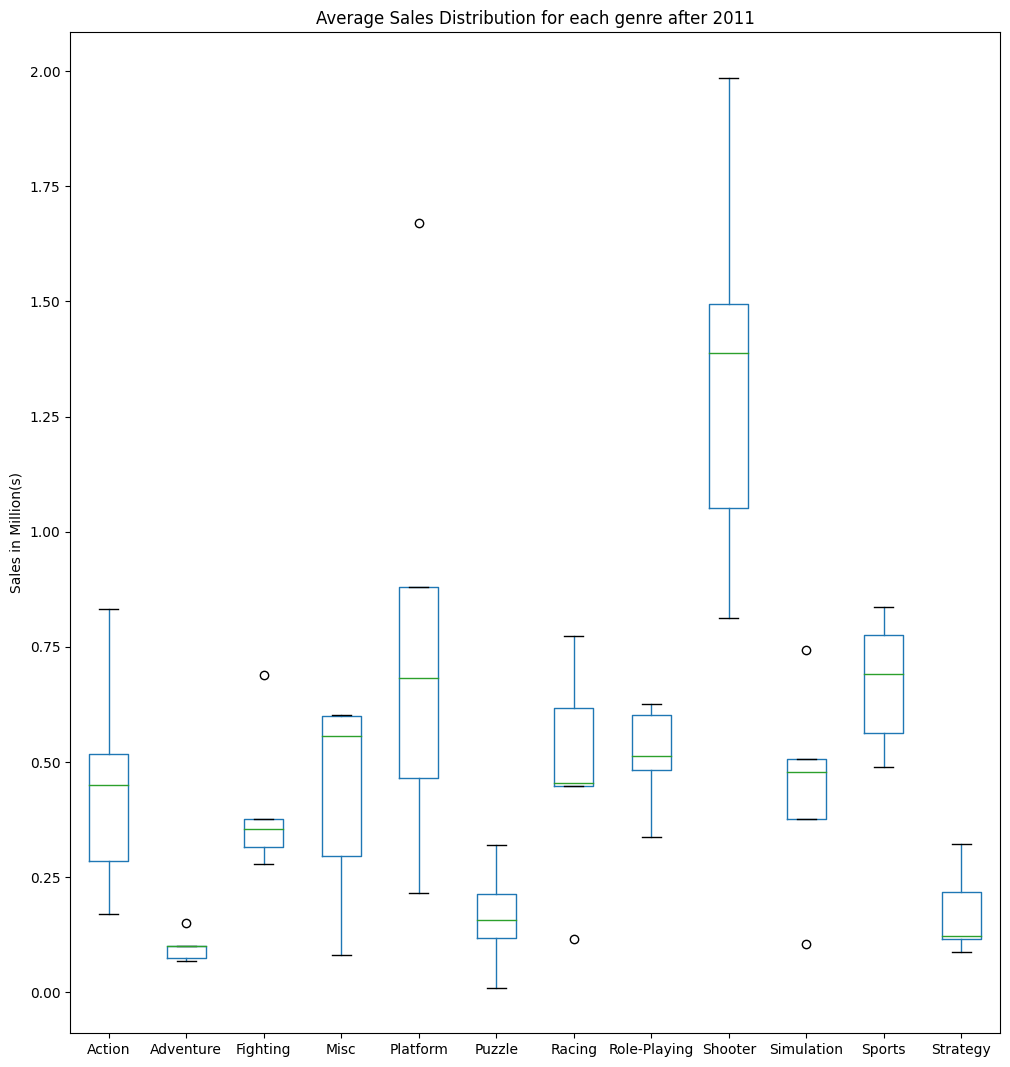

In [49]:
sales_per_genre.plot(
    kind='box',
    figsize=[12, 13],
    xlabel='Platforms',
    ylabel='Sales in Million(s)',
    title='Average Sales Distribution for each genre after 2011'
)


plt.show()

The plot shows that Shooter genre has the highest volume in terms of sale per game unit. Some genres such as Action, Fighting, Platform, and Racing have outliers in their distribution. This might suggest that some years, their sales would go to the extreme values, gaining a much higher and/or lower profit than their usual values.

As with the platforms, I'm going to plot the correlation between the average sales of the genres and the critic scores.

In [50]:
# Sampling from 5 genres and looking for correlation between the critic scores and sales

action = df_new[df_new.genre == 'Action']
misc = df_new[df_new.genre == 'Misc']
rp = df_new[df_new.genre == 'Role-Playing']
shooter = df_new[df_new.genre == 'Shooter']
puzzle = df_new[df_new.genre == 'Puzzle']

# Graphing the plot for action

fig = px.scatter(
    action,
    x='critic_score',
    y='total_sales',
    trendline='ols',
    title='Action genre critic scores vs sales'
)

fig.show()
action[['total_sales', 'critic_score']].corr()

total_sales  critic_score
total_sales      1.000000      0.358142
critic_score     0.358142      1.000000

In [51]:
fig = px.scatter(
    misc,
    x='critic_score',
    y='total_sales',
    trendline='ols',
    title='Misc genre critic score vs sales'
)

fig.show()
misc[['critic_score', 'total_sales']].corr()

critic_score  total_sales
critic_score      1.000000     0.020334
total_sales       0.020334     1.000000

In [52]:
fig = px.scatter(
    rp,
    x='critic_score',
    y='total_sales',
    trendline='ols',
    title='Role-Playing genre critic score vs sales'
)

fig.show()
rp[['critic_score', 'total_sales']].corr()

critic_score  total_sales
critic_score      1.000000     0.414426
total_sales       0.414426     1.000000

In [53]:
fig = px.scatter(
    shooter,
    x='critic_score',
    y='total_sales',
    trendline='ols',
    title='Shooter genre critic score vs sales'
)

fig.show()
shooter[['critic_score', 'total_sales']].corr()

critic_score  total_sales
critic_score      1.000000     0.328088
total_sales       0.328088     1.000000

In [54]:
fig = px.scatter(
    puzzle,
    x='critic_score',
    y='total_sales',
    trendline='ols',
    title='Puzzle genre critic score vs sales'
)

fig.show()
puzzle[['critic_score', 'total_sales']].corr()

critic_score  total_sales
critic_score      1.000000     0.483492
total_sales       0.483492     1.000000

Similar to the platforms, the critic scores of the genres also affect the sales and correlate to each other on the positive scale. With a high enough correlation coefficient, it shows that low scoring games of whichever genre in general would show a lower profit, while higher scoring ones tend to gain more sales.

### Regional Profiles

Now I'm going to compare between regions.

In [55]:
# Creating a table that shows each region's sales based on platform

region_list = ['na_sales', 'eu_sales', 'jp_sales']

regional_platform_sales = df_new.groupby('platform').sum()[region_list]

# Pivotting the regions' sales
na_sales = pd.pivot_table(
    df_new,
    index='year_of_release',
    columns='platform',
    values='na_sales',
    aggfunc='sum',
    fill_value=0
)

eu_sales = pd.pivot_table(
    df_new,
    index='year_of_release',
    columns='platform',
    values='eu_sales',
    aggfunc='sum',
    fill_value=0
)

jp_sales = pd.pivot_table(
    df_new,
    index='year_of_release',
    columns='platform',
    values='jp_sales',
    aggfunc='sum',
    fill_value=0
)
print("NA Sales:")
na_sales

NA Sales:


platform           3DS    DS    PC    PS3    PS4   PSP   PSV    Wii   WiiU  \
year_of_release                                                              
2012             17.11  4.02  8.01  39.88   0.00  0.13  5.94  10.89   8.89   
2013             15.56  0.57  3.88  41.45  10.13  0.00  2.52   4.48   9.85   
2014             12.33  0.00  3.51  16.39  34.75  0.00  1.98   1.59  10.50   
2015              6.17  0.00  2.36   4.99  42.37  0.00  0.39   0.43   6.76   
2016              4.14  0.00  1.36   0.67  21.49  0.00  0.15   0.06   2.10   

platform          X360   XOne  
year_of_release                
2012             58.39   0.00  
2013             53.36  11.85  
2014             20.25  30.97  
2015              7.36  36.03  
2016              0.69  14.27

In [56]:
print("EU Sales:")
eu_sales

EU Sales:


platform           3DS    DS     PC    PS3    PS4   PSP   PSV   Wii  WiiU  \
year_of_release                                                             
2012             11.68  2.68  12.40  39.05   0.00  0.25  5.26  5.99  5.28   
2013             14.84  0.85   7.39  42.27  11.05  0.17  2.57  3.34  6.70   
2014              8.73  0.00   8.87  18.24  46.50  0.00  2.45  1.86  6.66   
2015              5.06  0.00   5.57   6.04  51.76  0.00  0.69  0.62  5.01   
2016              2.33  0.00   3.53   1.26  31.78  0.00  0.39  0.11  1.48   

platform          X360   XOne  
year_of_release                
2012             32.00   0.00  
2013             27.03   5.34  
2014             11.28  18.15  
2015              3.50  18.47  
2016              0.71   9.63

In [57]:
print('JP Sales:')
jp_sales

JP Sales:


platform           3DS    DS  PC    PS3   PS4   PSP   PSV   Wii  WiiU  X360  \
year_of_release                                                               
2012             19.98  3.72   0  11.94  0.00  7.18  2.45  3.34  2.13  1.06   
2013             23.57  0.00   0  12.13  0.94  2.93  4.05  0.05  3.57  0.43   
2014             20.69  0.00   0   6.25  2.97  0.24  6.13  0.00  3.19  0.08   
2015             15.52  0.00   0   3.67  6.31  0.12  4.85  0.00  3.45  0.00   
2016              8.03  0.00   0   1.30  5.74  0.00  3.56  0.00  0.67  0.00   

platform         XOne  
year_of_release        
2012             0.00  
2013             0.02  
2014             0.14  
2015             0.17  
2016             0.01

In [58]:
# Putting the top platforms in a list
na_top_plat = (regional_platform_sales.sort_values(by='na_sales', ascending=False).index)[0:5]
eu_top_plat = (regional_platform_sales.sort_values(by='eu_sales', ascending=False).index)[0:5]
jp_top_plat = (regional_platform_sales.sort_values(by='jp_sales', ascending=False).index)[0:5]

print(na_top_plat)
print(eu_top_plat)
print(jp_top_plat)

Index(['X360', 'PS4', 'PS3', 'XOne', '3DS'], dtype='object', name='platform')
Index(['PS4', 'PS3', 'X360', 'XOne', '3DS'], dtype='object', name='platform')
Index(['3DS', 'PS3', 'PSV', 'PS4', 'WiiU'], dtype='object', name='platform')


It seems that NA and EU have really similar top 5s, with X360 and PS4 being on the top of both regions respectively, and have the same platforms on the top 5, albeit different standings. This suggests that NA and EU users prefer plugged consoles, with EU still having a place on the top 4 for PC. JP's top selling platforms are very unique. 4 of the top selling platforms are handheld, portable ones which are the 3DS and PSV. This shows that JP customers prefer smaller and compact platforms that people can bring anywhere with them.

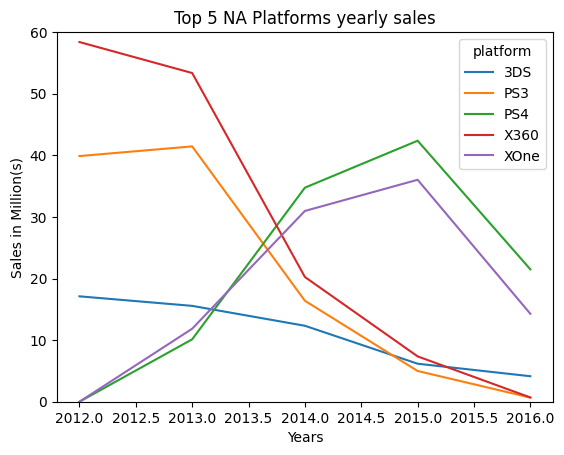

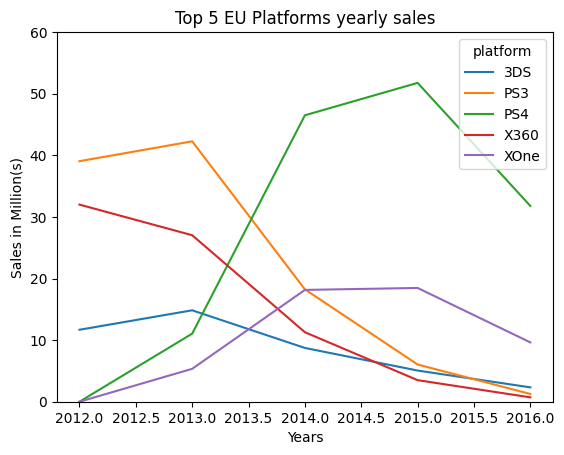

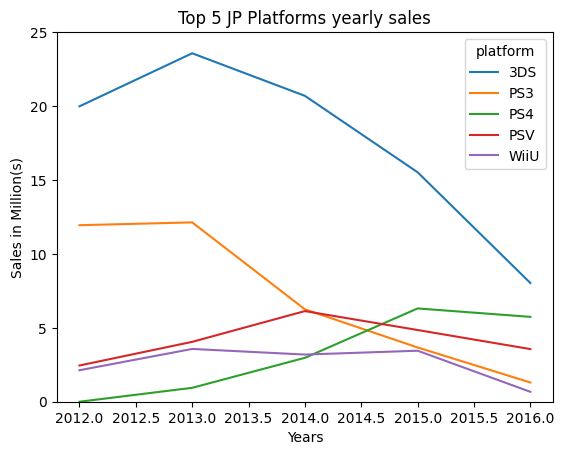

In [59]:
# Grabbing and visualizing the top 5 platforms of each region's sales
na_plat_sales = df_new[df_new.platform.isin(na_top_plat)].pivot_table(
    index='year_of_release',
    columns='platform',
    values='na_sales',
    aggfunc='sum',
    fill_value=0
)

eu_plat_sales = df_new[df_new.platform.isin(eu_top_plat)].pivot_table(
    index='year_of_release',
    columns='platform',
    values='eu_sales',
    aggfunc='sum',
    fill_value=0
)

jp_plat_sales = df_new[df_new.platform.isin(jp_top_plat)].pivot_table(
    index='year_of_release',
    columns='platform',
    values='jp_sales',
    aggfunc='sum',
    fill_value=0
)

na_plat_sales.plot(
    kind='line',
    title='Top 5 NA Platforms yearly sales',
    ylabel='Sales in Million(s)',
    xlabel='Years',
    ylim=(0, 60)
)

eu_plat_sales.plot(
    kind='line',
    title='Top 5 EU Platforms yearly sales',
    xlabel='Years',
    ylabel='Sales in Million(s)',
    ylim=(0, 60)
)

jp_plat_sales.plot(
    kind='line',
    title='Top 5 JP Platforms yearly sales',
    xlabel='Years',
    ylabel='Sales in Million(s)',
    ylim=(0, 25)
)

plt.show()

From the graph we can see that NA's sales were stabilizing a little before 2014, with the top platforms converging to the same amount of sales during that time of the year. The recent leading platform is currently PS4, which is going to continue to grow on NA. EU's market converges around 2015, also with PS4 as the lead on most sales. JP has 3DS leading on sales since mid 2012, and continues to stay relevant to this day. There's not a lot of fluctuation in the top platforms' sales in JP, which suggests quite a stable market in games. 


In [60]:
# Genre sales per region

regional_genre_sales = df_new.groupby('genre').sum()[region_list]
regional_genre_sales

na_sales  eu_sales  jp_sales
genre                                     
Action          177.84    159.34     52.80
Adventure         8.92      9.46      8.24
Fighting         19.79     10.79      9.44
Misc             38.19     26.32     12.86
Platform         25.38     21.41      8.63
Puzzle            1.13      1.40      2.14
Racing           17.22     27.29      2.50
Role-Playing     64.00     48.53     65.44
Shooter         144.77    113.47      9.23
Simulation        7.97     14.55     10.41
Sports           81.53     69.09      8.01
Strategy          4.23      5.17      2.88

In [61]:
# Putting the top genres in a list
na_top_gen = (regional_genre_sales.sort_values(by='na_sales', ascending=False).index)[0:5]
eu_top_gen = (regional_genre_sales.sort_values(by='eu_sales', ascending=False).index)[0:5]
jp_top_gen = (regional_genre_sales.sort_values(by='jp_sales', ascending=False).index)[0:5]

print(na_top_gen)
print(eu_top_gen)
print(jp_top_gen)

Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')
Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'], dtype='object', name='genre')
Index(['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting'], dtype='object', name='genre')


Similar to how the platforms are, the top 5 genres of both NA and EU are very much alike, with the top 3 having of both having the same genres. The only difference is that NA users prefer Miscellaneous, mixture of games while EU users prefer RPGs. JP once again has its own thing, albeit not having a major difference. The top genre in JP is role-playing games, followed by Action, Misc, Platform, and Adventure. The top 1 is very true in the sense that most popular games from JP are their JRPGS.

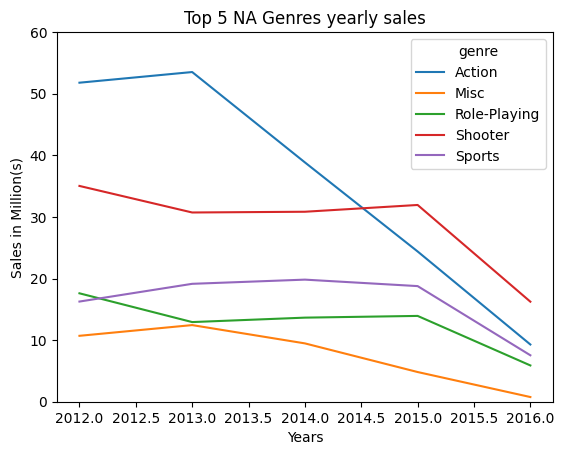

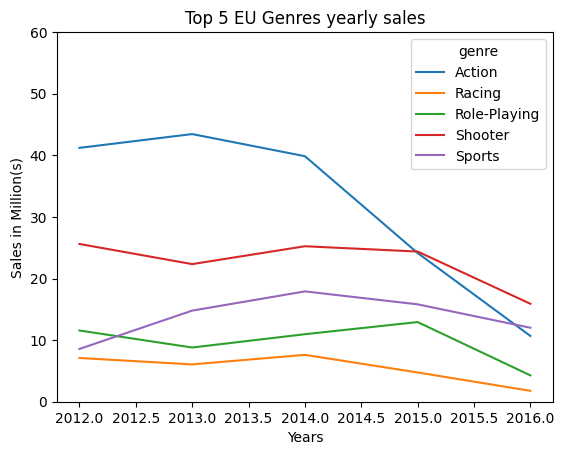

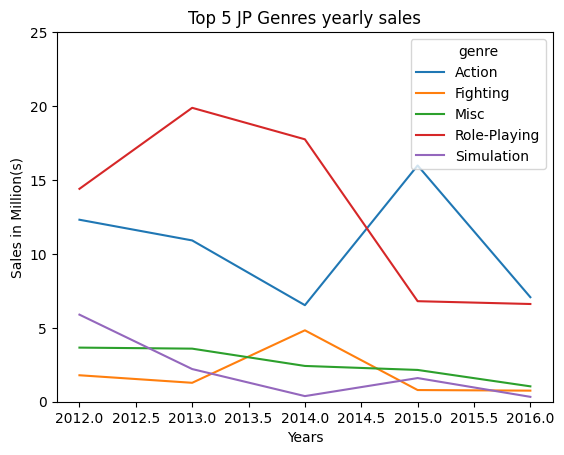

In [62]:
# Grabbing and visualizing the top 5 genres of each region's sales
na_gen_sales = df_new[df_new.genre.isin(na_top_gen)].pivot_table(
    index='year_of_release',
    columns='genre',
    values='na_sales',
    aggfunc='sum',
    fill_value=0
)

eu_gen_sales = df_new[df_new.genre.isin(eu_top_gen)].pivot_table(
    index='year_of_release',
    columns='genre',
    values='eu_sales',
    aggfunc='sum',
    fill_value=0
)

jp_gen_sales = df_new[df_new.genre.isin(jp_top_gen)].pivot_table(
    index='year_of_release',
    columns='genre',
    values='jp_sales',
    aggfunc='sum',
    fill_value=0
)

na_gen_sales.plot(
    kind='line',
    title='Top 5 NA Genres yearly sales',
    ylabel='Sales in Million(s)',
    xlabel='Years',
    ylim=(0, 60)
)

eu_gen_sales.plot(
    kind='line',
    title='Top 5 EU Genres yearly sales',
    xlabel='Years',
    ylabel='Sales in Million(s)',
    ylim=(0, 60)
)

jp_gen_sales.plot(
    kind='line',
    title='Top 5 JP Genres yearly sales',
    xlabel='Years',
    ylabel='Sales in Million(s)',
    ylim=(0, 25)
)

plt.show()

The graph shows that Action had a really good start in sales, but has been dwindling since recently; having been caught up by Shooter since 2015 on 2 regions. Meanwhile, JP's top selling genre Role-Playing has stabilized after 2015, almost having the same sales as Action this year.

In [63]:
# Checking ESRB Rating correlation to sales

# Grabbing the ratings
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [64]:
# I will use numbers to represent the ratings so I may quantify and put the ratings in hierarchy

# Violence rating from 0 to 5, with 0 being mild to 5 being highly violent
# As RP rating is still undecided rating, I will not include it in the rating
ratings_dict = {
    'EC': 0,
    'E': 1, # E and K-A are the same according to ESRB docs
    'K-A': 1,
    'E10+': 2,
    'T': 3,
    'M': 4,
    'AO': 5,
}

# Creating a function to add the values to the dataframe

def violence_rating(rating):
    try:
        return ratings_dict[rating]
    except:
        return np.nan
   



In [65]:
df_new['violence_rating'] = df_new['rating'].apply(violence_rating)
df_new

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
34        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                              ...      ...              ...           ...   
16432               Strawberry Nauts      PSV             2016     Adventure   
16436               Aiyoku no Eustia      PSV             2014          Misc   
16439  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16441        Haitaka no Psychedelica      PSV             2016     Adventure   
16443            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
34         4.99      5.73      0.65         2.42          83.0         5.3   
...         ...       ...       ...          ...           ...         ...   
16432      0.00      0.00      0.01         0.00           NaN         NaN   
16436      0.00      0.00      0.01         0.00           NaN         NaN   
16439      0.00      0.00      0.01         0.00           NaN         NaN   
16441      0.00      0.00      0.01         0.00           NaN         NaN   
16443      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  violence_rating  
16         M        21.05              4.0  
23         M        16.27              4.0  
31       NaN        14.63              NaN  
33       NaN        14.60              NaN  
34         M        13.79              4.0  
...      ...          ...              ...  
16432    NaN         0.01              NaN  
16436    NaN         0.01              NaN  
16439    NaN         0.01              NaN  
16441    NaN         0.01              NaN  
16443    NaN         0.01              NaN  

[2886 rows x 13 columns]

In [66]:
df_new.rating.unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

In [67]:
# Grabbing the sales from each region by the rating
df_new.groupby('violence_rating').median()[region_list]

na_sales  eu_sales  jp_sales
violence_rating                              
1.0                 0.070      0.06      0.00
2.0                 0.130      0.11      0.00
3.0                 0.050      0.04      0.01
4.0                 0.155      0.13      0.00

The values on NA seem to not follow a certain pattern regarding the violence rating and sales, while EU seems to show that a higher violence rating leads to higher sales. The median on JP  seems to show very minimal values.

In [68]:
# Plotting correlation to the games' ratings and the EU sales.
fig = px.scatter(
    df_new,
    x='violence_rating',
    y='eu_sales',
    trendline='ols'
)

fig.show()
df_new[['violence_rating', 'eu_sales']].corr()

violence_rating  eu_sales
violence_rating           1.0000    0.0596
eu_sales                  0.0596    1.0000

EU's games ratings seem to have an impact on the sales, albeit very minimal.

In [69]:
# Checking how many entries do JP have sales on
df_new[(df_new.jp_sales != 0)]

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
34        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                              ...      ...              ...           ...   
16432               Strawberry Nauts      PSV             2016     Adventure   
16436               Aiyoku no Eustia      PSV             2014          Misc   
16439  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16441        Haitaka no Psychedelica      PSV             2016     Adventure   
16443            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
34         4.99      5.73      0.65         2.42          83.0         5.3   
...         ...       ...       ...          ...           ...         ...   
16432      0.00      0.00      0.01         0.00           NaN         NaN   
16436      0.00      0.00      0.01         0.00           NaN         NaN   
16439      0.00      0.00      0.01         0.00           NaN         NaN   
16441      0.00      0.00      0.01         0.00           NaN         NaN   
16443      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  violence_rating  
16         M        21.05              4.0  
23         M        16.27              4.0  
31       NaN        14.63              NaN  
33       NaN        14.60              NaN  
34         M        13.79              4.0  
...      ...          ...              ...  
16432    NaN         0.01              NaN  
16436    NaN         0.01              NaN  
16439    NaN         0.01              NaN  
16441    NaN         0.01              NaN  
16443    NaN         0.01              NaN  

[1569 rows x 13 columns]

In [70]:
# Adding other conditions
df_new[(df_new.rating.isna()) & (df_new.jp_sales != 0)]

name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4             2015   
33                           Pokemon X/Pokemon Y      3DS             2013   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
72                                     Minecraft     X360             2013   
83               Pokemon Black 2/Pokemon White 2       DS             2012   
...                                          ...      ...              ...   
16432                           Strawberry Nauts      PSV             2016   
16436                           Aiyoku no Eustia      PSV             2014   
16439              Samurai Warriors: Sanada Maru      PS3             2016   
16441                    Haitaka no Psychedelica      PSV             2016   
16443                        Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31          Shooter      6.03      5.86      0.36         2.38           NaN   
33     Role-Playing      5.28      4.19      4.35         0.78           NaN   
47     Role-Playing      4.35      3.49      3.10         0.74           NaN   
72             Misc      5.70      2.65      0.02         0.81           NaN   
83     Role-Playing      2.79      1.72      3.14         0.41           NaN   
...             ...       ...       ...       ...          ...           ...   
16432     Adventure      0.00      0.00      0.01         0.00           NaN   
16436          Misc      0.00      0.00      0.01         0.00           NaN   
16439        Action      0.00      0.00      0.01         0.00           NaN   
16441     Adventure      0.00      0.00      0.01         0.00           NaN   
16443    Simulation      0.00      0.00      0.01         0.00           NaN   

       user_score rating  total_sales  violence_rating  
31            NaN    NaN        14.63              NaN  
33            NaN    NaN        14.60              NaN  
47            NaN    NaN        11.68              NaN  
72            NaN    NaN         9.18              NaN  
83            NaN    NaN         8.06              NaN  
...           ...    ...          ...              ...  
16432         NaN    NaN         0.01              NaN  
16436         NaN    NaN         0.01              NaN  
16439         NaN    NaN         0.01              NaN  
16441         NaN    NaN         0.01              NaN  
16443         NaN    NaN         0.01              NaN  

[942 rows x 13 columns]

It seems that over half of JP entries don't have any ratings, and therefore the ratings hardly affect sales for JP.

### Testing Statistical Hypotheses

First, I am going to test the statistical hypothesis that the average user ratings between Xbox One and PC are the same.

H₀ = The average user ratings between Xbox One and PC are the same

H1 = The average user ratings between Xbox One and PC differs.

In [71]:
# Testing the hypothesis

# Setting the alpha value to 5% as it is an appropriate amount of percentage to consider uncertainty

alpha = 0.05

# Applying the test for comparing both data
results = st.ttest_ind(
    df_new[(df_new.platform == 'XOne') & (~df_new.user_score.isna())]['user_score'],
    df_new[(df_new.platform == 'PC') & (~df_new.user_score.isna())]['user_score']
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value: 0.5535080500643661
We can't reject the null hypothesis.


The analysis suggests that the average user ratings for XOne and PC are the same. This could mean that the platforms themselves don't really affect how users give their ratings. This might be the reason to the low correlation between the users' scores and the sales.

Next, I'm going to do another test on genre samples, namely Action and Sports, and see if their average user ratings are also the same.

H₀ = The average user ratings between Action and Sports are the same.

H1 = The average user ratings between Action and Sports differs.

In [72]:
# Testing the hypothesis

results_genre = st.ttest_ind(
    df_new[(df_new.genre == 'Action') & (~df_new.user_score.isna())]['user_score'],
    df_new[(df_new.genre == 'Sports') & (~df_new.user_score.isna())]['user_score']
)

print('p-value:', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value: 3.7163089460934874e-26
We reject the null hypothesis.


Contrary to the platforms' analysis where they have  in user ratings, this one suggests that Action and Sports don't have the same ratings from each other. This shows that genres might actually impact how the users score the games.

## Conclusion

The data I've gathered has provided some insights in regards to next years' advertising campaign.

First of all, I've concluded that platforms' relevance are, on average, 7 years after their release. This leads me to building a model that takes data that's only related to the past 7 years. The leading platforms are currently PS3 and X360. However, as they are consoles that have lasted for a very long time, their sales have dwindled in recent years. As such, they would have trouble keeping sales for the upcoming year. Moreover, their successors have started picking up traction; namely the PS4 and XOne, which people would prefer over their old versions. 

PS4 and XOne has shown a considerable increase in sales since their first release. This could be a potentially profitable platform that we can invest on for next year's campaign. The other platforms we should look out for are the 3DS and the WiiU. These platforms are also relatively new, and has had good sales for the past years. Their predecessor, the Wii and DS, has shown longevity in their relevance on the market, and thus the 2 new platforms has great potential, and could perform as well as or even better than their older versions. 

Lastly, the platform that has shown relevance for over 25 years is the PC. This platform has shown that it has been, is, and always will be on the market. Nowadays almost everyone has a PC in their household or possesions. And due to that multi functionality of the device itself, there will always be entries on the PC, which also means sales for the PC.

The data I've gathered also gives some insights to each region's users' behavior. While NA and EU users prefer plugged consoles as platforms to play on, JP Users very much prefer compact, handheld portable ones. It is very wise to focus advertisement on NA and EU for consoles such as the PS4 and XOne, as the user base are leaning more towards it. For EU, I would suggest also investing in PC games, as they are pretty popular in EU as well, and the platform itself has been doing well for a long time. For JP, it is much more profitable to go for the newer portable platforms such as the 3DS and PSV as they're still growing and have really great potential in terms of profits on JP. 

The genre that's very promiment in the world is currently Action. While they may be a bit oversaturated on the market, it does show promise as they will continue to generate high sales due to popularity. The main focus one however, would have to be Shooter. It's earned more per game unit in comparison to other genres, which means that it will be much cheaper to invest on Shooter due to the low amount of entries. For JP however, Role Playing games should be the go to, as it is the very core of JP's gaming industry and it will always show promising sales.

Age ratings don't really seem to play a huge role on sales. EU's might have a slight influence on the profits, but it seems to be very minimal as well. This means that we don't really have to take into consideration of the games' ratings.